In [1]:
# In this notebook:
# Extract text from multiple PDFs and insert into dataframe
# Clean PDF-style text
# Run cluster analysis to group PDFs

In [52]:
import os
import glob
import PyPDF2
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [3]:
pd.set_option('display.max_colwidth', 100)

In [4]:
# quick look at PDF files in current directory
# c_xxx are concert related
# r_xxx are return policy related
# y_xxx are YMCA related
files = [f for f in os.listdir('.') if os.path.isfile(f)]
for f in files:
    if f.endswith('.pdf'):
        print(f)

c_001.pdf
c_002.pdf
c_003.pdf
r_001.pdf
r_002.pdf
r_003.pdf
y_001.pdf
y_002.pdf
y_003.pdf


In [5]:
columns = ['name', 'group', 'text', 'len_1', 'pages']
data = []

for file in glob.glob("./*.pdf"):
    
    obj = open(file, 'rb')
    reader = PyPDF2.PdfFileReader(obj)
    page = reader.getPage(0) # just extracting 1st page 

    data.append([file[2:-4], file[2], page.extractText(),
                 len(page.extractText()), reader.numPages])
    
pdata = pd.DataFrame(data, columns=columns)
        
pdata

,name,group,text,len_1,pages
0,c_001,c,\n\n-\n19\n \n\n \nFREE ADMISSION \n\n-\n19 is made possible by the generous donation...,715,1
1,c_002,c,2018 Summer Concerts\n \n06\n-\n07 \n \nRod Tuffcurls & the Benchpress\n \nFood: Rocco Vinos\n \...,704,1
2,c_003,c,"\nCalendar of Events Fall 2018\n \n\n \n\n \nAugust \n \nFriday, August 24, 2018\n...",2994,2
3,r_001,r,"Elsevier Returns Policy for US/Canada\n \nresellers, \nbooksellers and \nindividuals\n \nAll \nR...",3359,1
4,r_002,r,Simply NUC U.S. Return Policy \n This U.S. Return Policy applies only to purchases of Simply NUC...,3635,2
5,r_003,r,\n \n MERCHANDISE RETURN POLICY \n WOODMAN™S WILL GLADLY REFUND OR EXCHANGE ANY ITEM* \nWHE...,1092,1
6,y_001,y,OPEN TO ALL– the \nYMCA of Pierce and \nKitsap Counties \nwelcomes all who wish \n\nto particip...,2685,1
7,y_002,y,YMCA\n \nof the East Bay\n \n \n \n \n \nand Ca\nlifornia YMCA Youth & Government\n \nFinanci...,1949,4
8,y_003,y,YMCA of Bucks County\n Financial Assistance Policy/Application\n The \nYMCA of Bucks County...,3130,2


### Preprocess text

In [6]:
pdata.pop('pages')
pdata['new_text'] = pdata['text']

pdata.head(2)

,name,group,text,len_1,new_text
0,c_001,c,\n\n-\n19\n \n\n \nFREE ADMISSION \n\n-\n19 is made possible by the generous donation...,715,\n\n-\n19\n \n\n \nFREE ADMISSION \n\n-\n19 is made possible by the generous donation...
1,c_002,c,2018 Summer Concerts\n \n06\n-\n07 \n \nRod Tuffcurls & the Benchpress\n \nFood: Rocco Vinos\n \...,704,2018 Summer Concerts\n \n06\n-\n07 \n \nRod Tuffcurls & the Benchpress\n \nFood: Rocco Vinos\n \...


In [7]:
import re 

def remove_whitespace(x):
    return re.sub('\s+', ' ', x)

In [8]:
pdata['new_text'] = pdata['new_text'].apply(remove_whitespace)

pdata.head(2)

,name,group,text,len_1,new_text
0,c_001,c,\n\n-\n19\n \n\n \nFREE ADMISSION \n\n-\n19 is made possible by the generous donation...,715,- 19 FREE ADMISSION - 19 is made possible by the generous donations of individuals and corporat...
1,c_002,c,2018 Summer Concerts\n \n06\n-\n07 \n \nRod Tuffcurls & the Benchpress\n \nFood: Rocco Vinos\n \...,704,2018 Summer Concerts 06 - 07 Rod Tuffcurls & the Benchpress Food: Rocco Vinos 06 - 14 American E...


In [9]:
pdata['new_text'] = pdata['new_text'].apply(lambda x:
                                            " ".join(x.lower()
                                            for x in str(x).split()))
pdata.head(2)

,name,group,text,len_1,new_text
0,c_001,c,\n\n-\n19\n \n\n \nFREE ADMISSION \n\n-\n19 is made possible by the generous donation...,715,- 19 free admission - 19 is made possible by the generous donations of individuals and corporate...
1,c_002,c,2018 Summer Concerts\n \n06\n-\n07 \n \nRod Tuffcurls & the Benchpress\n \nFood: Rocco Vinos\n \...,704,2018 summer concerts 06 - 07 rod tuffcurls & the benchpress food: rocco vinos 06 - 14 american e...


In [10]:
from nltk.corpus import stopwords

stop = stopwords.words('english')

pdata['new_text'] = pdata['new_text'].apply(lambda x:
                                            " ".join(x for x in str(x).split()
                                            if x not in stop))

pdata.head(2)

,name,group,text,len_1,new_text
0,c_001,c,\n\n-\n19\n \n\n \nFREE ADMISSION \n\n-\n19 is made possible by the generous donation...,715,"- 19 free admission - 19 made possible generous donations individuals corporate sponsors, well s..."
1,c_002,c,2018 Summer Concerts\n \n06\n-\n07 \n \nRod Tuffcurls & the Benchpress\n \nFood: Rocco Vinos\n \...,704,2018 summer concerts 06 - 07 rod tuffcurls & benchpress food: rocco vinos 06 - 14 american engli...


In [11]:
def num_extract(x):
    nums = ""
    for word in str(x).split():
        if word.isnumeric():
            nums += (str(word) + " ")
    return nums

In [12]:
def sym_extract(x):
    syms = ""
    for char in x:
        if (char.isalnum() == False) & (char != ' '):
            syms += (str(char) + " ") 
    return syms

In [13]:
pdata['nums'] = pdata['new_text'].apply(num_extract)
pdata['syms'] = pdata['new_text'].apply(sym_extract)

pdata
# We see some noticeable patterns with nums & syms,
# will quantify to simulate larger datsets

,name,group,text,len_1,new_text,nums,syms
0,c_001,c,\n\n-\n19\n \n\n \nFREE ADMISSION \n\n-\n19 is made possible by the generous donation...,715,"- 19 free admission - 19 made possible generous donations individuals corporate sponsors, well s...",19 19 2018 19,"- - , , . : . / - - . - - - - ."
1,c_002,c,2018 Summer Concerts\n \n06\n-\n07 \n \nRod Tuffcurls & the Benchpress\n \nFood: Rocco Vinos\n \...,704,2018 summer concerts 06 - 07 rod tuffcurls & benchpress food: rocco vinos 06 - 14 american engli...,2018 06 07 06 14 06 21 06 28 1976 07 04 07 12 07 19 07 26 08 02 08 09 06 07 7 9 960,"- & : - : - : - : - & - & : - : - - : - - & : - , . ( ) . . !"
2,c_003,c,"\nCalendar of Events Fall 2018\n \n\n \n\n \nAugust \n \nFriday, August 24, 2018\n...",2994,"calendar events fall 2018 august friday, august 24, 2018 white concert hall 7:30 p.m. september ...",2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2...,", , : . . , , - : : . . $ $ $ , , : . . , , : . . $ $ $ , , : , , : . . , , - : : . . $ $ $ , , ..."
3,r_001,r,"Elsevier Returns Policy for US/Canada\n \nresellers, \nbooksellers and \nindividuals\n \nAll \nR...",3359,"elsevier returns policy us/canada resellers, booksellers individuals returns send to: linn distr...",1799 50 65051 90 90 30 60,"/ , : , , , : / . . . @ . . . . : . . . ( ) . . ( ) ( ) ; ( % ) . . . , . . ( ) , . . . : / / . ..."
4,r_002,r,Simply NUC U.S. Return Policy \n This U.S. Return Policy applies only to purchases of Simply NUC...,3635,simply nuc u.s. return policy u.s. return policy applies purchases simply nuc products directly ...,14 10,". . . . . . , - , , . ' / . ( , , ) . ( ) - . , / ( ) . ( ) , , ( ) . ( ) ' - . ( ) , . ( ) - , ..."
5,r_003,r,\n \n MERCHANDISE RETURN POLICY \n WOODMAN™S WILL GLADLY REFUND OR EXCHANGE ANY ITEM* \nWHE...,1092,merchandise return policy woodman™s gladly refund exchange item* returned unopened within 30 day...,30 30,"™ * . * . , . . : ( ) . , . . . . . ™ , , . , : & ˘ ˙ ˙ ˙ ˝ ˙ ˙ ˛ ˚ ˘ ˜ ! "" # $ ˘ ˜ ˘ % & ˜ # ' ..."
6,y_001,y,OPEN TO ALL– the \nYMCA of Pierce and \nKitsap Counties \nwelcomes all who wish \n\nto particip...,2685,open all– ymca pierce kitsap counties welcomes wish participate. financial assistance provided i...,18 15 8 10123 678 10550 98332 10123 98332,"– . , . . . . - - . ™ : : : : , , : : - : : ( + ) ( - ) < ) / . . / . ( ) . . . , , , , . ™ $ . ..."
7,y_002,y,YMCA\n \nof the East Bay\n \n \n \n \n \nand Ca\nlifornia YMCA Youth & Government\n \nFinanci...,1949,ymca east bay ca lifornia ymca youth & government financial assistance & individual scholarship ...,2 1040 2 1099 30,"& & & . , , . . . ( - ) . . . / . . ( ) : : ( ) , - , / - , : , , , , ( ) / - : - , , , , . . . ..."
8,y_003,y,YMCA of Bucks County\n Financial Assistance Policy/Application\n The \nYMCA of Bucks County...,3130,"ymca bucks county financial assistance policy/application ymca bucks county charitable, non -pro...",3 21 215 2500 601 19030 2018,"/ , - . , . , , , . . , . . , . - . , . , . , . . . . , . , ( ) . - . , . . . . , , . / . . . , ..."


In [14]:
for group in pdata['group'].unique():
    print (f'Group {group} numbers:')
    print(pd.Series(' '.join(pdata[pdata['group'] == group]['nums']).split()).value_counts())
    print('\n')
# here we see that only 2018 really holds weight
# since 2018 is a timestamp (not relevant in future years) it will be removed

Group c numbers:
2018    32
07       6
06       5
19       4
08       2
1976     1
9        1
02       1
12       1
09       1
26       1
960      1
28       1
04       1
21       1
14       1
7        1
dtype: int64


Group r numbers:
30       3
90       2
1799     1
14       1
65051    1
50       1
60       1
10       1
dtype: int64


Group y numbers:
2        2
98332    2
10123    2
2500     1
18       1
3        1
215      1
30       1
10550    1
19030    1
601      1
1040     1
2018     1
678      1
21       1
15       1
1099     1
8        1
dtype: int64




In [15]:
for group in pdata['group'].unique():
    print (f'Group {group} symbols:')
    print(pd.Series(' '.join(pdata[pdata['group'] == group]['syms']).split()).value_counts())
    print('\n')
# here we see that $, ), ( hold weight

Group c symbols:
.    66
,    59
:    40
$    33
-    23
&     4
!     1
/     1
)     1
(     1
dtype: int64


Group r symbols:
.    88
,    49
)    25
(    25
-    13
˙     8
:     7
/     6
˘     4
'     4
˛     3
˜     3
*     3
+     2
#     2
&     2
™     2
!     2
%     2
$     2
˝     1
"     1
;     1
@     1
˚     1
dtype: int64


Group y symbols:
.    80
,    68
-    30
:    24
)    13
(    12
/     7
&     3
@     3
™     3
+     1
<     1
$     1
–     1
dtype: int64




In [16]:
def remove_nums(x):
    new_phrase = ""
    for word in str(x).split():
        if word.isnumeric():
            pass
        else:
            new_phrase += (word + ' ')
    return new_phrase

In [17]:
def remove_syms(x):
    new_phrase = ""
    for char in x:
        if (char.isalnum() == False) & (char not in [' ','$',')','(']):
            pass
        else:
            new_phrase += char 
    return new_phrase

In [18]:
pdata['new_text'] = pdata['new_text'].apply(remove_nums)
pdata['new_text'] = pdata['new_text'].apply(remove_syms)

pdata.head(2)

,name,group,text,len_1,new_text,nums,syms
0,c_001,c,\n\n-\n19\n \n\n \nFREE ADMISSION \n\n-\n19 is made possible by the generous donation...,715,free admission made possible generous donations individuals corporate sponsors well support pr...,19 19 2018 19,"- - , , . : . / - - . - - - - ."
1,c_002,c,2018 Summer Concerts\n \n06\n-\n07 \n \nRod Tuffcurls & the Benchpress\n \nFood: Rocco Vinos\n \...,704,summer concerts rod tuffcurls benchpress food rocco vinos american english food charkies hel...,2018 06 07 06 14 06 21 06 28 1976 07 04 07 12 07 19 07 26 08 02 08 09 06 07 7 9 960,"- & : - : - : - : - & - & : - : - - : - - & : - , . ( ) . . !"


In [19]:
pdata.pop('nums')
pdata.pop('syms')

pdata.head(2)

,name,group,text,len_1,new_text
0,c_001,c,\n\n-\n19\n \n\n \nFREE ADMISSION \n\n-\n19 is made possible by the generous donation...,715,free admission made possible generous donations individuals corporate sponsors well support pr...
1,c_002,c,2018 Summer Concerts\n \n06\n-\n07 \n \nRod Tuffcurls & the Benchpress\n \nFood: Rocco Vinos\n \...,704,summer concerts rod tuffcurls benchpress food rocco vinos american english food charkies hel...


In [21]:
word_count = pd.Series(' '.join(pdata['new_text']).split()).value_counts()

print(f'Unique words: {len(word_count)}')
print(f'Sum of words: {sum(word_count)}')

word_count[:10]

Unique words: 883
Sum of words: 1952


concert       46
return        31
ymca          29
pm            28
white         26
hall          26
730           23
assistance    21
may           21
simply        19
dtype: int64

In [24]:
rare_words = word_count[(word_count <= 2)]

print(f'Rare word count is: {len(rare_words)}')

Rare word count is: 710


In [26]:
pdata['new_text'] = pdata['new_text'].apply(lambda x:
                                            " ".join(x for x in str(x).split()
                                            if x not in rare_words))
pdata['len_2'] = pdata['new_text'].apply(len)
# len_2 to visualize text reduction

pdata

,name,group,text,len_1,new_text,len_2
0,c_001,c,\n\n-\n19\n \n\n \nFREE ADMISSION \n\n-\n19 is made possible by the generous donation...,715,made individuals support provided visit receive program holiday concert,71
1,c_002,c,2018 Summer Concerts\n \n06\n-\n07 \n \nRod Tuffcurls & the Benchpress\n \nFood: Rocco Vinos\n \...,704,food rocco vinos food food food rocco vinos food food concert food rocco vinos food band food ro...,122
2,c_003,c,"\nCalendar of Events Fall 2018\n \n\n \n\n \nAugust \n \nFriday, August 24, 2018\n...",2994,calendar friday white concert hall 730 pm september tuesday september stage live white concert h...,1687
3,r_001,r,"Elsevier Returns Policy for US/Canada\n \nresellers, \nbooksellers and \nindividuals\n \nAll \nR...",3359,elsevier returns policy individuals returns linn center east linn returns returns elsevier must ...,1216
4,r_002,r,Simply NUC U.S. Return Policy \n This U.S. Return Policy applies only to purchases of Simply NUC...,3635,simply nuc us return policy us return policy simply nuc products directly simply nuc simply nuc ...,1591
5,r_003,r,\n \n MERCHANDISE RETURN POLICY \n WOODMAN™S WILL GLADLY REFUND OR EXCHANGE ANY ITEM* \nWHE...,1092,merchandise return policy refund item returned within days receipt exceptions returns receipt ma...,379
6,y_001,y,OPEN TO ALL– the \nYMCA of Pierce and \nKitsap Counties \nwelcomes all who wish \n\nto particip...,2685,ymca financial assistance provided individuals need access programs ymca financial may applicati...,760
7,y_002,y,YMCA\n \nof the East Bay\n \n \n \n \n \nand Ca\nlifornia YMCA Youth & Government\n \nFinanci...,1949,ymca east ymca youth financial assistance ymca east provide access youth programs support financ...,657
8,y_003,y,YMCA of Bucks County\n Financial Assistance Policy/Application\n The \nYMCA of Bucks County...,3130,ymca bucks county financial assistance ymca bucks county non quality ymca people e responsibilit...,992


### TFIDF

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [41]:
tf = TfidfVectorizer(max_features=5000, lowercase=True, analyzer='word',
                        stop_words = None, ngram_range=(1,2))
# symbols are removed when analyzer = 'word'

tfvec = tf.fit_transform(pdata['new_text'])

tfvec

<9x830 sparse matrix of type '<class 'numpy.float64'>'
	with 1019 stored elements in Compressed Sparse Row format>

In [42]:
random_vocab = {x: tf.vocabulary_[x] for x in list(tf.vocabulary_)[:10]}

random_vocab

{'made': 340,
 'individuals': 298,
 'support': 707,
 'provided': 562,
 'visit': 764,
 'receive': 590,
 'program': 546,
 'holiday': 281,
 'concert': 111,
 'made individuals': 342}

### Cluster analysis

In [54]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

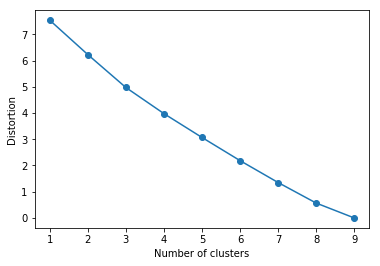

In [48]:
distortions = []
for i in range(1, 10):
    km = KMeans(n_clusters=i, init='k-means++',
                n_init=10, max_iter=300, random_state=0)
    km.fit(tfvec)
    distortions.append(km.inertia_)
plt.plot(range(1, 10), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()
# surprisingly elbow method shows no ideal # of clusters 

In [50]:
# Dendrogram preparation
from scipy.cluster.hierarchy import linkage
row_clusters = linkage(tfvec.toarray(), method='complete', metric='euclidean')
pd.DataFrame(row_clusters, columns=['row label 1', 'row label 2',
                                    'distance', '# of items in cluster'],
                           index=['cluster %d' % (i+1) for i in range(
                                  row_clusters.shape[0])])

,row label 1,row label 2,distance,# of items in cluster
cluster 1,7.0,8.0,1.065342,2.0
cluster 2,3.0,5.0,1.251474,2.0
cluster 3,4.0,10.0,1.289690,3.0
cluster 4,6.0,9.0,1.289846,3.0
cluster 5,0.0,2.0,1.348549,2.0
cluster 6,1.0,13.0,1.405478,3.0
cluster 7,11.0,12.0,1.405851,6.0
cluster 8,14.0,15.0,1.414214,9.0


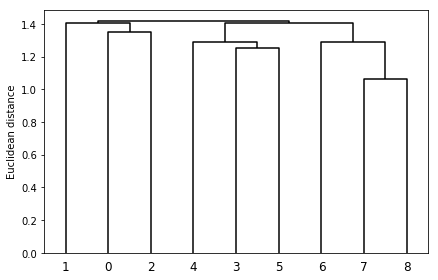

In [53]:
# Dendrogram
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import set_link_color_palette
set_link_color_palette(['black'])
row_dendr = dendrogram(row_clusters, color_threshold=np.inf)

plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()
# we see successful grouping via dendrogram

In [61]:
# K-means
km = KMeans(n_clusters=3, init='k-means++',
            n_init=10, max_iter=300, random_state=0)
km_pred = km.fit_predict(tfvec)
# Agglomerative
ac = AgglomerativeClustering(n_clusters=3,
                             affinity='euclidean',
                             linkage='complete')
ac_pred = ac.fit_predict(tfvec.toarray())
# DBSCAN
db = DBSCAN(eps=0.5, min_samples=3, metric='euclidean')
db_pred = db.fit_predict(tfvec.toarray())

In [62]:
pdata['km_pred'] = km_pred
pdata['ac_pred'] = ac_pred
pdata['db_pred'] = db_pred

pdata

,name,group,text,len_1,new_text,len_2,km_pred,ac_pred,db_pred
0,c_001,c,\n\n-\n19\n \n\n \nFREE ADMISSION \n\n-\n19 is made possible by the generous donation...,715,made individuals support provided visit receive program holiday concert,71,2,0,-1
1,c_002,c,2018 Summer Concerts\n \n06\n-\n07 \n \nRod Tuffcurls & the Benchpress\n \nFood: Rocco Vinos\n \...,704,food rocco vinos food food food rocco vinos food food concert food rocco vinos food band food ro...,122,2,0,-1
2,c_003,c,"\nCalendar of Events Fall 2018\n \n\n \n\n \nAugust \n \nFriday, August 24, 2018\n...",2994,calendar friday white concert hall 730 pm september tuesday september stage live white concert h...,1687,2,0,-1
3,r_001,r,"Elsevier Returns Policy for US/Canada\n \nresellers, \nbooksellers and \nindividuals\n \nAll \nR...",3359,elsevier returns policy individuals returns linn center east linn returns returns elsevier must ...,1216,0,2,-1
4,r_002,r,Simply NUC U.S. Return Policy \n This U.S. Return Policy applies only to purchases of Simply NUC...,3635,simply nuc us return policy us return policy simply nuc products directly simply nuc simply nuc ...,1591,0,2,-1
5,r_003,r,\n \n MERCHANDISE RETURN POLICY \n WOODMAN™S WILL GLADLY REFUND OR EXCHANGE ANY ITEM* \nWHE...,1092,merchandise return policy refund item returned within days receipt exceptions returns receipt ma...,379,0,2,-1
6,y_001,y,OPEN TO ALL– the \nYMCA of Pierce and \nKitsap Counties \nwelcomes all who wish \n\nto particip...,2685,ymca financial assistance provided individuals need access programs ymca financial may applicati...,760,1,1,-1
7,y_002,y,YMCA\n \nof the East Bay\n \n \n \n \n \nand Ca\nlifornia YMCA Youth & Government\n \nFinanci...,1949,ymca east ymca youth financial assistance ymca east provide access youth programs support financ...,657,1,1,-1
8,y_003,y,YMCA of Bucks County\n Financial Assistance Policy/Application\n The \nYMCA of Bucks County...,3130,ymca bucks county financial assistance ymca bucks county non quality ymca people e responsibilit...,992,1,1,-1


In [63]:
# Results:
# We see successful clustering with K-means, Dendrogram & Agglomerative clustering
# We see that DBSCAN is unable to cluster; likely due to large dissimiliarities

In [ ]:
# This concludes pt 02